In [1]:
import pandas as pd
import numpy as np

# Create a mock dataset
data = {
    'Date': ['2023-10-01', '2023-10-02', '2023-10-05', '2023-10-07', '2023-10-08', 
             '2023-11-01', '2023-11-03', '2023-11-05', '2023-11-10', '2023-11-12'],
    'Description': ['Starbucks Coffee', 'UBER TRIP', 'Amazon Purchase', 'Starbucks', 'Grocery Store',
                    'Rent Payment', 'Uber Trip', 'Netflix Subscription', 'AMZN Mktp', 'Whole Foods'],
    'Amount': [-5.50, -15.20, -45.00, -4.75, -80.00, 
               -1200.00, -18.50, -12.99, -22.50, -95.40],
    'Category': [np.nan, 'Transport', 'Shopping', np.nan, 'Food', 
                 'Rent', np.nan, 'Entertainment', np.nan, 'Food'] 
}

df = pd.DataFrame(data)

# Save it to CSV to simulate reading a real file
df.to_csv('bank_statement.csv', index=False)

print("Mock data created successfully!")

Mock data created successfully!


In [2]:
# Load the data
df = pd.read_csv('bank_statement.csv')

# 1. Convert Date to datetime objects (Crucial for time analysis)
df['Date'] = pd.to_datetime(df['Date'])

# Inspect the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         10 non-null     datetime64[ns]
 1   Description  10 non-null     object        
 2   Amount       10 non-null     float64       
 3   Category     6 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 452.0+ bytes
None
        Date       Description  Amount   Category
0 2023-10-01  Starbucks Coffee   -5.50        NaN
1 2023-10-02         UBER TRIP  -15.20  Transport
2 2023-10-05   Amazon Purchase  -45.00   Shopping
3 2023-10-07         Starbucks   -4.75        NaN
4 2023-10-08     Grocery Store  -80.00       Food


In [3]:
# 1. Standardize Descriptions using String methods
# Make everything lowercase to avoid case sensitivity issues
df['Description'] = df['Description'].str.lower()

# 2. Fill missing Categories based on keywords in Description
def categorize(row):
    desc = row['Description']
    if pd.notna(row['Category']): # If category already exists, keep it
        return row['Category']
    
    if 'starbucks' in desc:
        return 'Food & Drink'
    elif 'uber' in desc:
        return 'Transport'
    elif 'amazon' in desc or 'amzn' in desc:
        return 'Shopping'
    else:
        return 'Misc'

# Apply the function to every row
df['Category'] = df.apply(categorize, axis=1)

# 3. Make amounts positive for easier analysis (optional, but often easier to read)
df['Amount'] = df['Amount'].abs()

print(df)

        Date           Description   Amount       Category
0 2023-10-01      starbucks coffee     5.50   Food & Drink
1 2023-10-02             uber trip    15.20      Transport
2 2023-10-05       amazon purchase    45.00       Shopping
3 2023-10-07             starbucks     4.75   Food & Drink
4 2023-10-08         grocery store    80.00           Food
5 2023-11-01          rent payment  1200.00           Rent
6 2023-11-03             uber trip    18.50      Transport
7 2023-11-05  netflix subscription    12.99  Entertainment
8 2023-11-10             amzn mktp    22.50       Shopping
9 2023-11-12           whole foods    95.40           Food


In [4]:
category_spend = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("\n--- Total Spending by Category ---")
print(category_spend)


--- Total Spending by Category ---
Category
Rent             1200.00
Food              175.40
Shopping           67.50
Transport          33.70
Entertainment      12.99
Food & Drink       10.25
Name: Amount, dtype: float64


In [5]:
# Group by Month (M) and sum the amounts
monthly_spend = df.set_index('Date').resample('M')['Amount'].sum()

print("\n--- Monthly Spending Trends ---")
print(monthly_spend)


--- Monthly Spending Trends ---
Date
2023-10-31     150.45
2023-11-30    1349.39
Freq: ME, Name: Amount, dtype: float64


/tmp/ipykernel_13742/3504392495.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spend = df.set_index('Date').resample('M')['Amount'].sum()


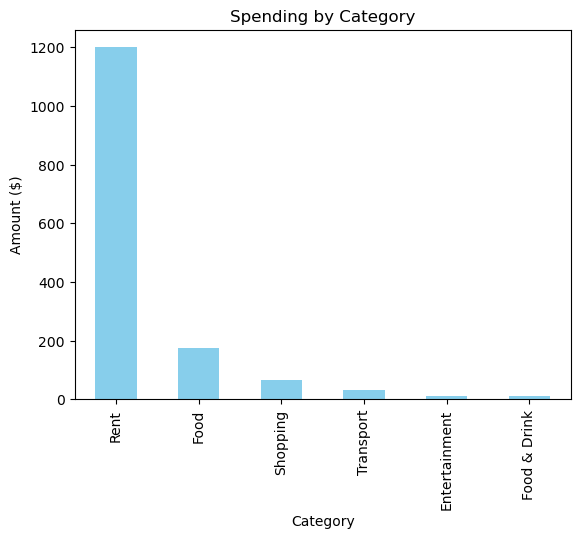

In [6]:
import matplotlib.pyplot as plt

# Plot spending by category
category_spend.plot(kind='bar', color='skyblue', title='Spending by Category')
plt.ylabel('Amount ($)')
plt.show()